In [2]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
from scipy import fftpack
from tabulate import tabulate
%matplotlib inline
mpl.rcParams['figure.dpi'] = 800
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})
font_size = 10

### Import data
copy the data file from postProcessing/forces/0/coefficient.data to ./data folder

In [3]:
f_name = "\\postProcessing\\forces\\"
end_name = "\\coefficient.dat"
fo_name = "E:\\Uni\\Bachelorarbeit\\notebooks\\plot_data\\cases\\"
cases = ['cylinder2D_base_400_50','cylinder2D_base_400_100','cylinder2D_base_400_200']
time_step = ['0.000125','0','0']
mesh_size = np.array([50, 100, 200])
reynolds_number = 400
data = {}
size = len(cases)
for i in range(0,size):
    data[cases[i]] = np.loadtxt(fo_name+cases[i]+f_name+time_step[i]+end_name, unpack=True, usecols=[0, 1, 3])

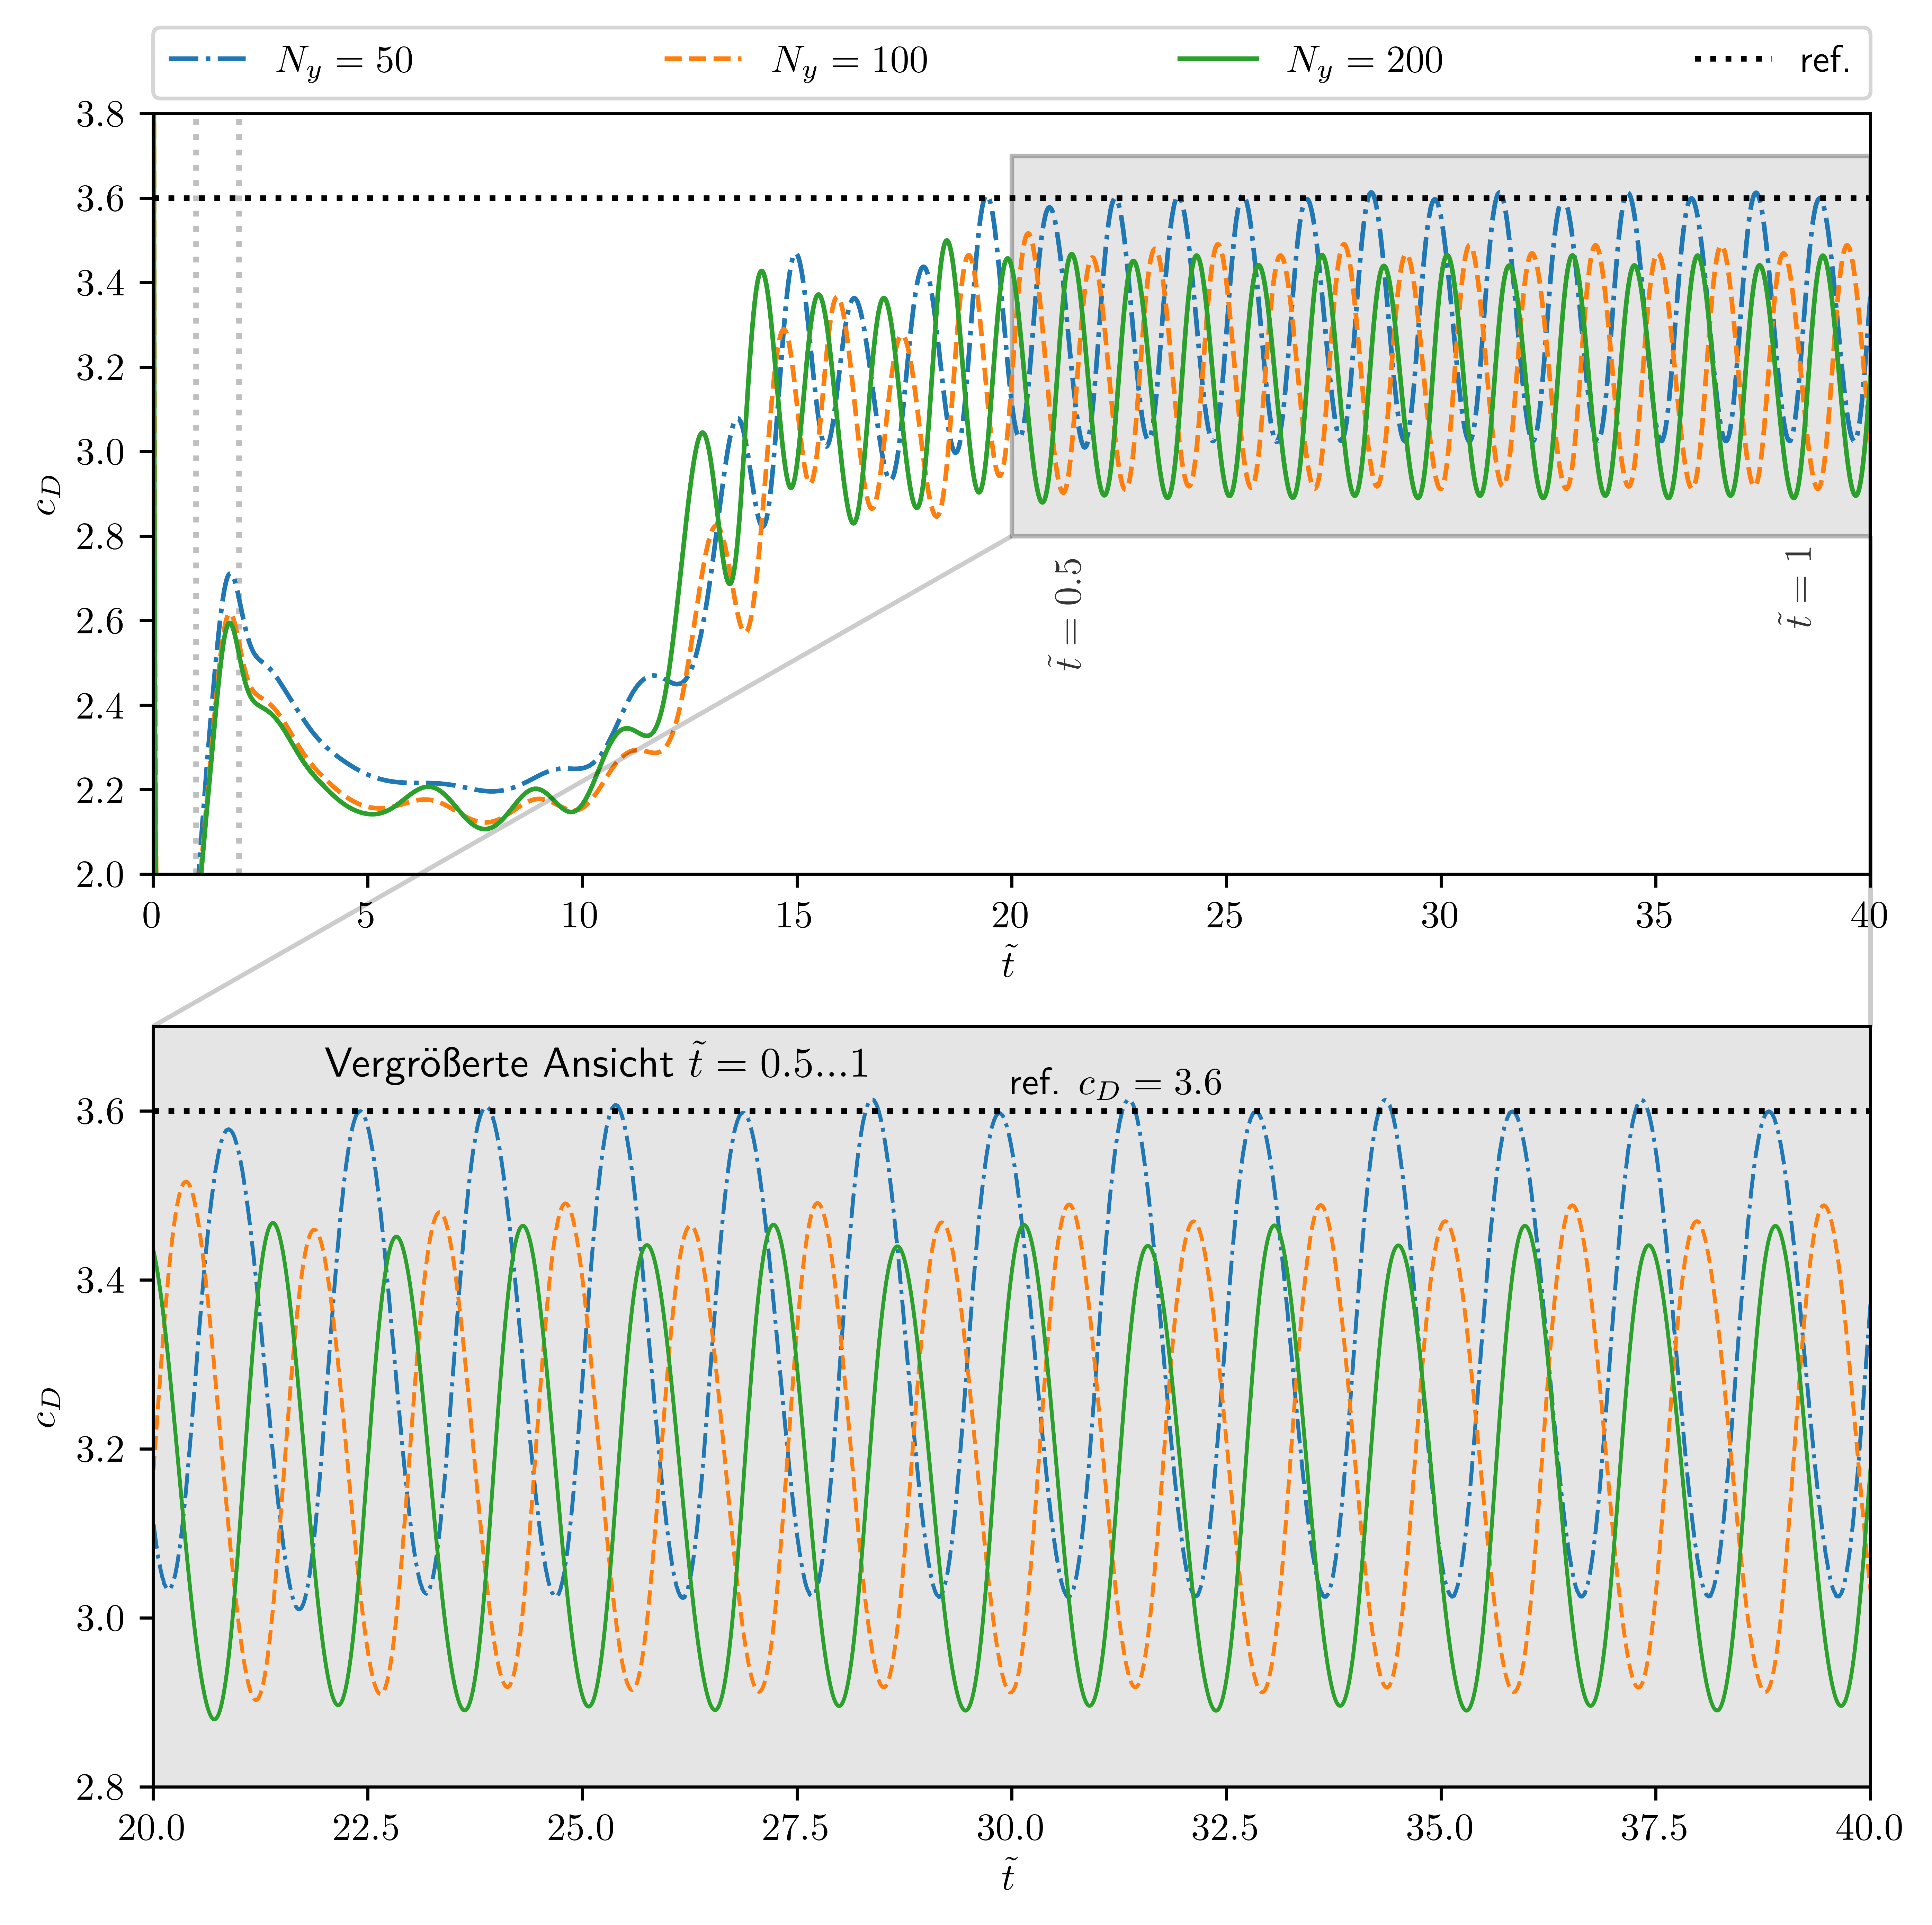

In [4]:
markers = ["o","+","s","h"]
lines = ['-.',"--","-",":"]
colors = ['#047495',"teal",'#c04e01',"red"] 

diameter = 0.1
labels = [r'$N_y={:d}$'.format(cells) for cells in mesh_size]

fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(8,8))

#ax1 = plt.axes(upper_plot_bounds, xticks=[], xlim=[t_min, t_max], ylim=[0, 10])
ax1.fill_between([20, 40], [2.8, 2.8], [3.7, 3.7], color='k', alpha=0.1) #[-1, 120]
ax1.tick_params(labelsize=font_size)
ax1.set_ylim((2,3.8))
ax1.set_ylabel(r"$c_D$", fontsize=font_size)
ax1.set_xlim((0,40))
ax1.set_xlabel(r"$\tilde{t}$", fontsize=font_size)
ax1.axvline(1, ls=":", color="k", alpha=0.25)
ax1.axvline(2, ls=":", color="k", alpha=0.25)

#ax2 = plt.axes(lower_plot_bounds, yticks=[7.0, 7.5, 8.0, 8.5], xlim=[t_min, t_max], ylim=[re_zoom_min, re_zoom_max])
ax2.patch.set_facecolor('k')
ax2.patch.set_alpha(0.1)
ax2.set_ylabel(r"$c_D$", fontsize=font_size)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=font_size)
ax2.tick_params(labelsize=font_size)
ax2.set_xlim((20,40))
ax2.set_ylim((2.92,3.25))
ax2.set_ylim((2.8, 3.7))

# plotting
for i, case in enumerate(cases):
    ax1.plot(data[case][0] * reynolds_number / 100 / diameter,data[case][1], lines[i], linewidth=1.2, markevery=70, label=labels[i])
    ax2.plot(data[case][0] * reynolds_number / 100 / diameter,data[case][1],lines[i], linewidth=1, markevery=70,  label=labels[i])
ax1.axhline(3.6, ls=":", markevery=0.05, color="k", label="ref.")
ax2.axhline(3.6, ls=":", markevery=0.05, color="k", label="ref.")

# for box and lines
def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, linewidth=1.2, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, linewidth=1.2, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, linewidth=1.2, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

mark_inset(ax1, ax2, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="k", alpha=0.2) 

# for legend
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=font_size)

# text in plot
ax2.text(22, 3.64, r"Vergrößerte Ansicht $ \tilde t ={:.1f}...{:.0f}$".format(0.5, 1), fontsize=font_size+1, color='k')
ax1.text(21, 2.5, r"$ \tilde t =0.5$", rotation=90, fontsize=font_size, color='k', alpha=0.8)
ax1.text(38, 2.6, r"$ \tilde t =1$", rotation=90, fontsize=font_size, color='k', alpha=0.8)
ax2.text(30, 3.62, r"ref. $ c_D =3.6$", fontsize=font_size, color='k')

fig.savefig('mesh_dp_cd_400.png')

Case cylinder2D_base_400_50:
mean drag/lift: 3.3210/-0.0522
Max drag: 3.6134
Min drag: 3.0099
Max lift: 2.8829
Min lift: -2.9806
Strouhal number: 0.3347

Case cylinder2D_base_400_100:
mean drag/lift: 3.1972/-0.0382
Max drag: 3.5162
Min drag: 2.9028
Max lift: 2.8443
Min lift: -2.9030
Strouhal number: 0.3413

Case cylinder2D_base_400_200:
mean drag/lift: 3.1717/-0.0379
Max drag: 3.4673
Min drag: 2.8798
Max lift: 2.8277
Min lift: -2.9017
Strouhal number: 0.3428



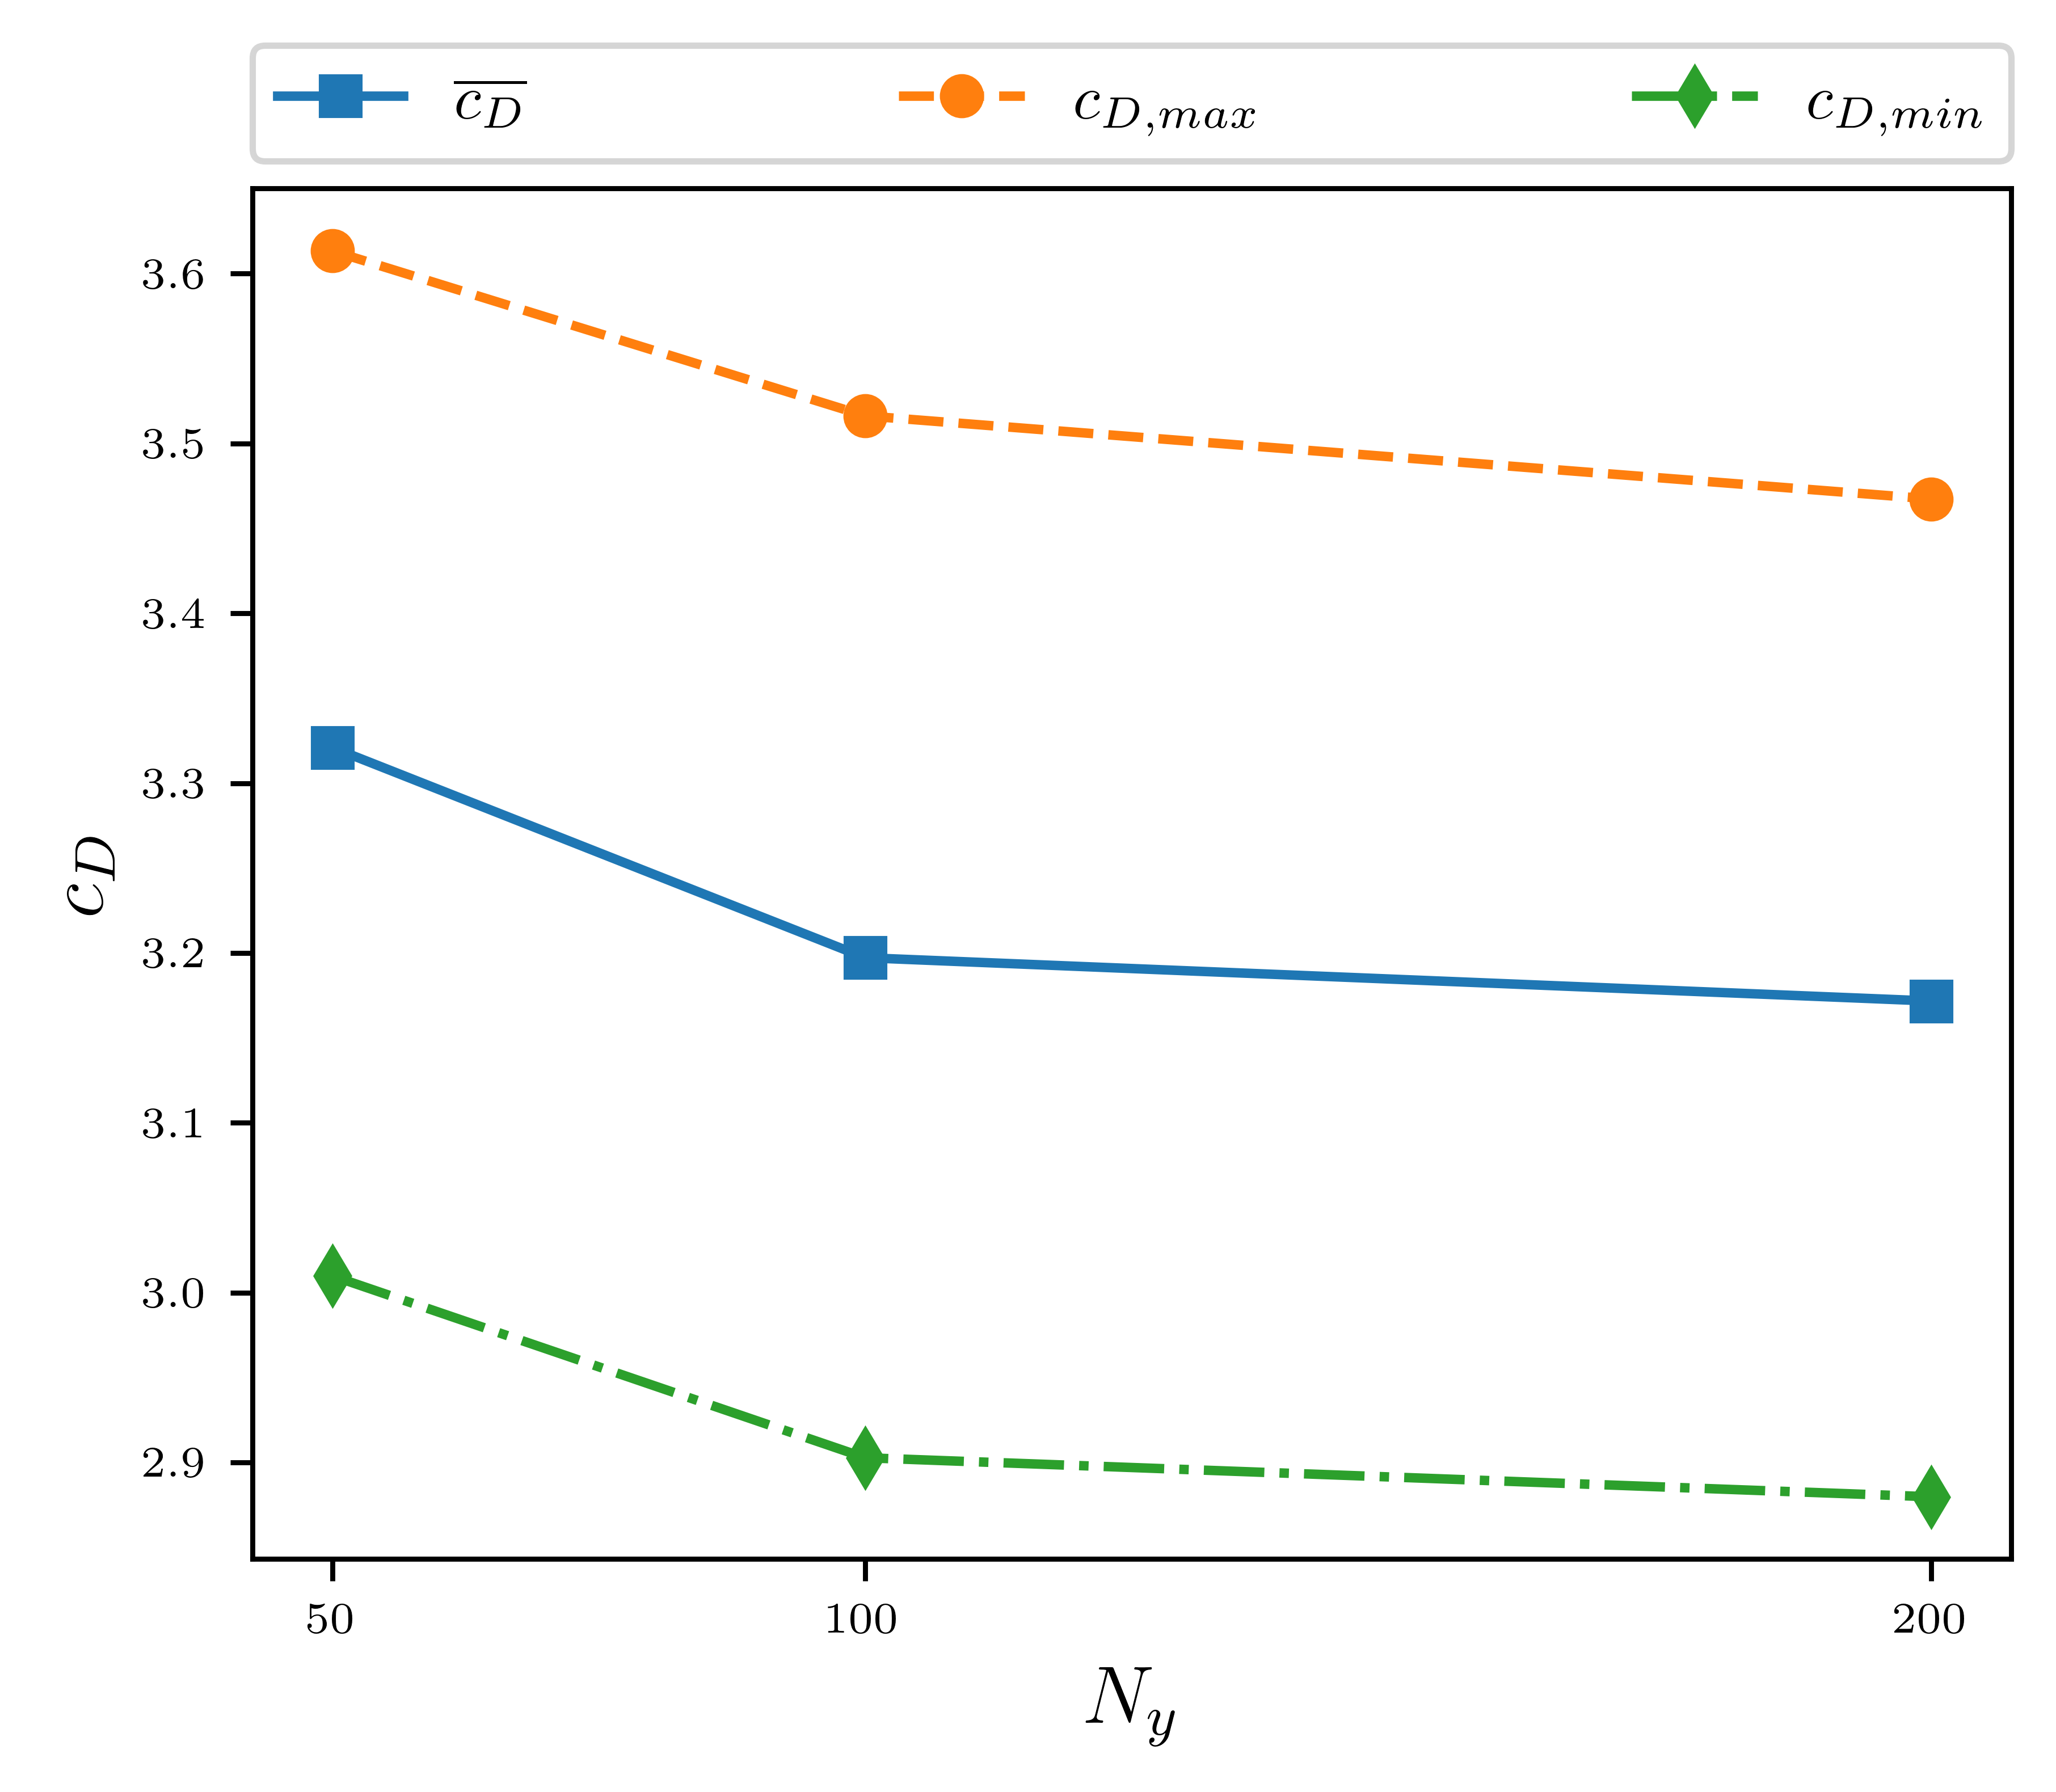

In [5]:
from scipy.signal import argrelmin
from scipy.signal import argrelmax

cd = np.zeros(len(mesh_size))
ma_cd = np.zeros(len(mesh_size))
mi_cd = np.zeros(len(mesh_size))
cl = np.zeros(len(mesh_size))
St = np.zeros(len(mesh_size))
comp_time = np.array([337.39, 1933.08, 15719.68])
clock_time = np.array([346, 1952, 15786])

for i, case in enumerate(cases):
    tml = (np.abs(list(data.values())[i][0] - 0.5)).argmin()
    tml2 = (np.abs(list(data.values())[i][0] - 1)).argmin()
    
    # cd
    minima = argrelmin(np.abs(list(data.values())[i][1][tml:tml2]),order=5)
    maxima = argrelmax(np.abs(list(data.values())[i][1][tml:tml2]),order=5)
    minima = minima[0]
    maxima = maxima[0]
    
    begin_average_cd = minima[0] + tml
    end_average_cd = maxima[len(maxima)-1] + tml
    max_cd = (list(data.values())[i][1][tml:tml2]).argmax() + tml
    min_cd = (list(data.values())[i][1][tml:tml2]).argmin() + tml
    
    # cl
    minima = argrelmin(list(data.values())[i][2][tml:tml2],order=5)
    maxima = argrelmax(list(data.values())[i][2][tml:tml2],order=5)
    minima = minima[0]
    maxima = maxima[0]
    
    begin_average_cl = minima[0] + tml
    end_average_cl = maxima[len(maxima)-1] + tml
    max_cl = (list(data.values())[i][2][tml:tml2]).argmax() + tml
    min_cl = (list(data.values())[i][2][tml:tml2]).argmin() + tml
    
    #frequency
    
    # sine fit
    
    def fit_sin(tt, yy):
        '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
        tt = np.array(tt)
        yy = np.array(yy)
        ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
        Fyy = abs(np.fft.fft(yy))
        guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
        guess_amp = np.std(yy) * 2.**0.5
        guess_offset = np.mean(yy)
        guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

        def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
        popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
        A, w, p, c = popt
        f = w/(2.*np.pi)
        fitfunc = lambda t: A * np.sin(w*t + p) + c
        return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

    t = data[case][0][tml:tml2]
    y = data[case][2][tml:tml2]
    res = fit_sin(t,y)
    f_sin_fit = res["freq"]
    St_sin_fit = f_sin_fit * 0.1/(reynolds_number/100)
    
    print("Case " + case + ":")
    print("mean drag/lift: {:2.4f}/{:2.4f}".format(np.round(data[case][1][begin_average_cd:end_average_cd].mean(), 4), np.round(data[case][2][begin_average_cl:end_average_cl].mean(), 4)))
    print("Max drag: {:2.4f}".format(data[case][1][max_cd]))
    print("Min drag: {:2.4f}".format(data[case][1][min_cd]))
    print("Max lift: {:2.4f}".format(data[case][2][max_cl]))
    print("Min lift: {:2.4f}".format(data[case][2][min_cl]))
    print("Strouhal number: {:2.4f}".format(St_sin_fit))
    print("")
    
    cd[i] = np.round(data[case][1][begin_average_cd:end_average_cd].mean(), 4)
    ma_cd[i] = data[case][1][max_cd]
    mi_cd[i] = data[case][1][min_cd]


fig, ax = plt.subplots(figsize=(5,4))

ax.plot(mesh_size, cd, '-s', label="$\overline{c_D}$")
ax.plot(mesh_size, ma_cd, '--o', label="$c_{D,max}$")
ax.plot(mesh_size, mi_cd, '-.d', label="$c_{D,min}$")
ax.set_ylabel(r"$c_D$", fontsize=font_size+3)
ax.set_xlabel(r"$N_y$", fontsize=font_size+3)
ax.set_xticks(ticks = mesh_size)

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=font_size)

fig.savefig('Cds_over_Nx')

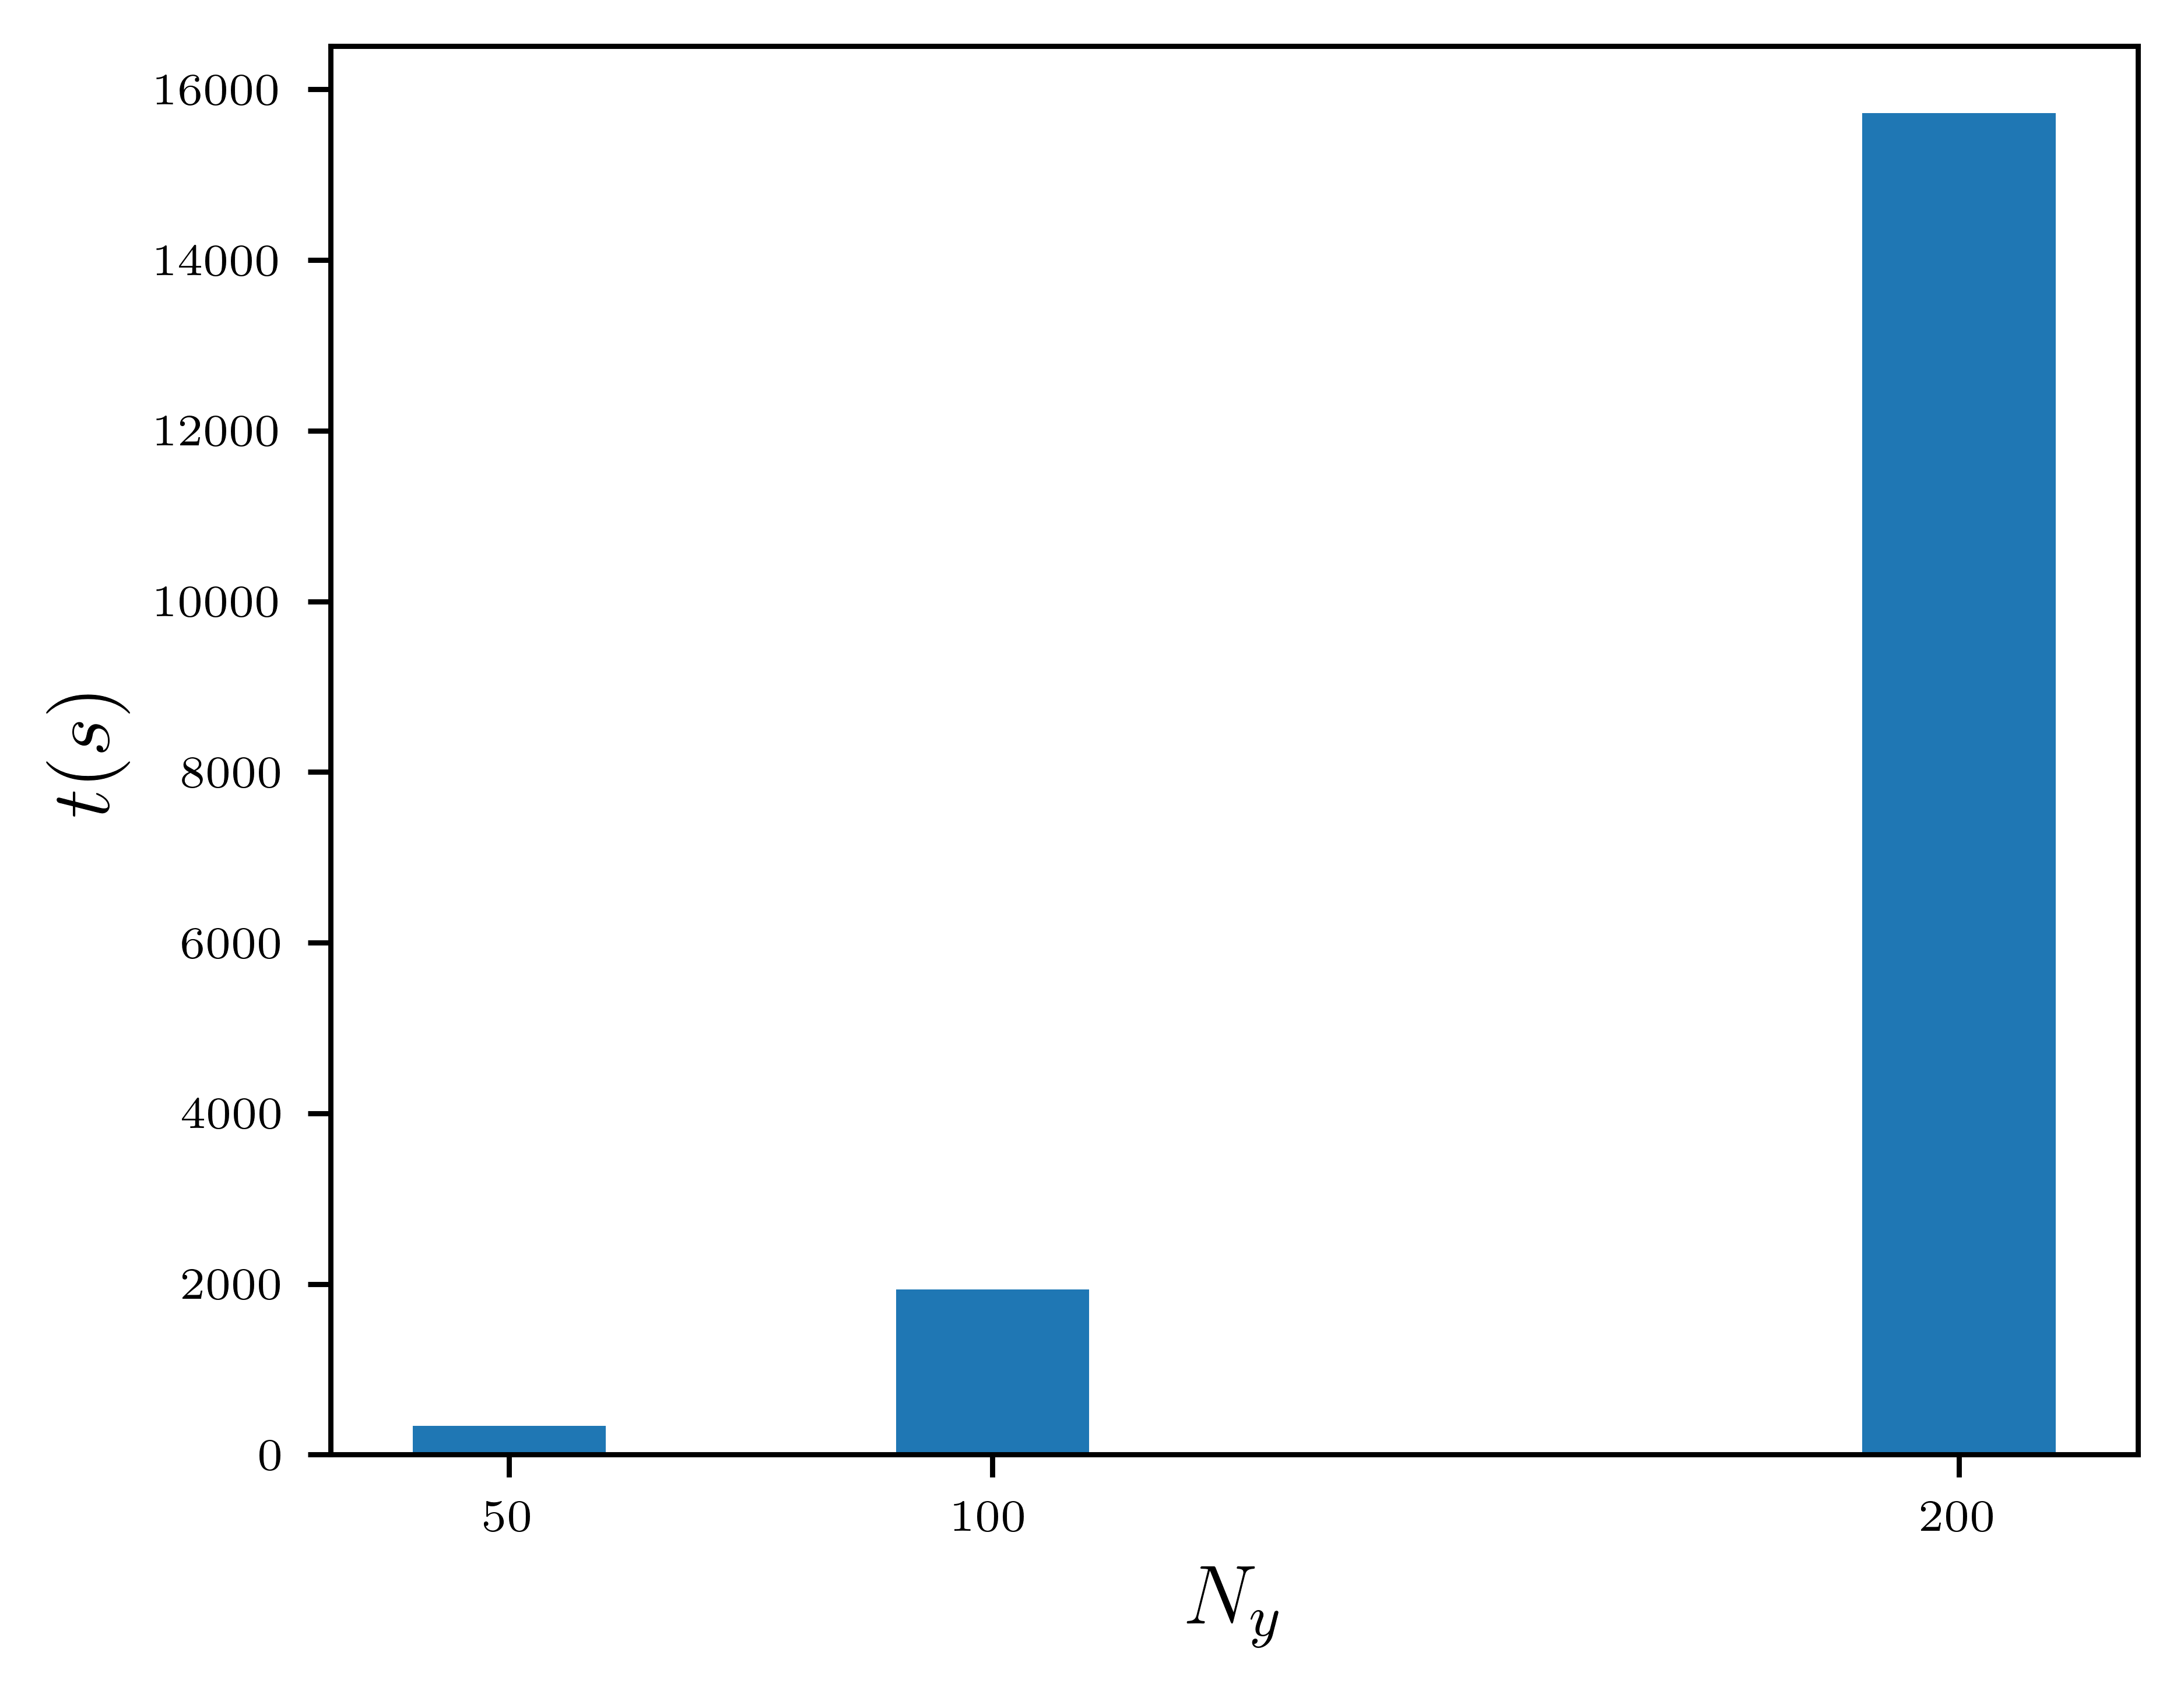

In [6]:
fig, ax = plt.subplots(figsize=(5,4))

ax.bar(mesh_size, comp_time, width=20)
ax.set_ylabel(r"$t (s)$", fontsize=font_size+3)
ax.set_xlabel(r"$N_y$", fontsize=font_size+3)
ax.set_xticks(ticks = mesh_size)

fig.savefig('time_over_Nx')

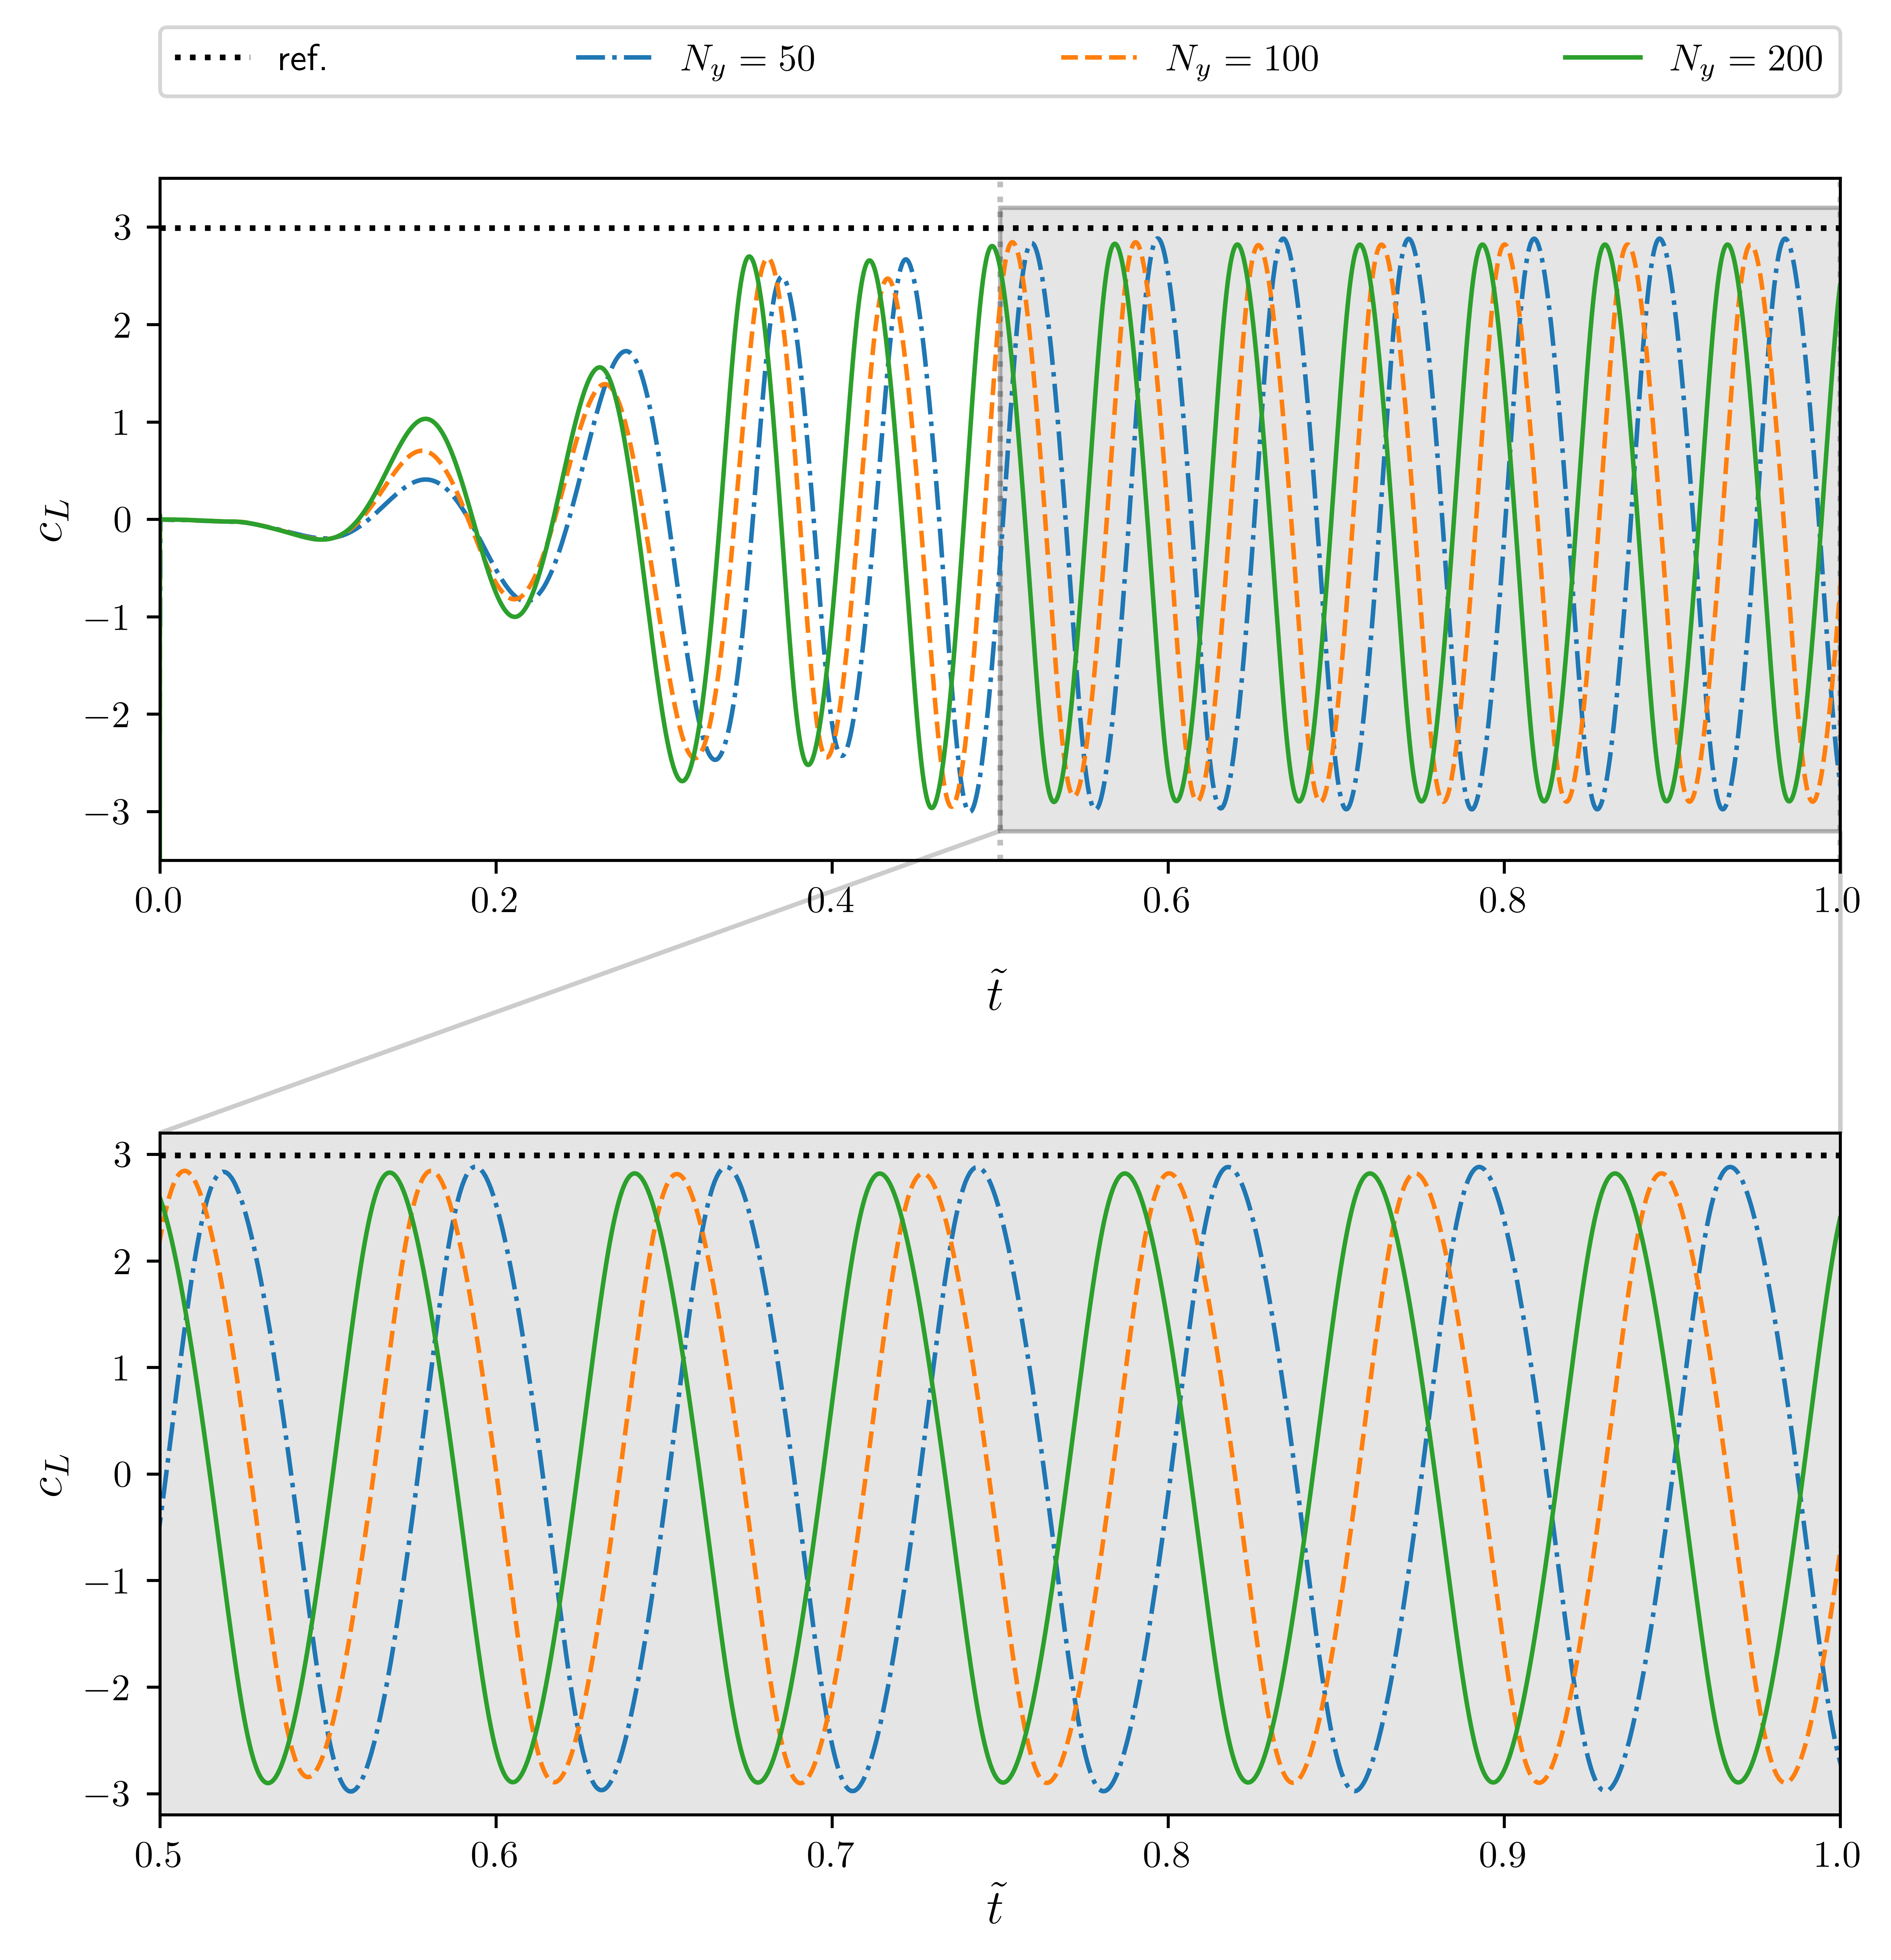

In [7]:
font_size = 10

fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(8,8))

#ax1 = plt.axes(upper_plot_bounds, xticks=[], xlim=[t_min, t_max], ylim=[0, 10])
ax1.fill_between([0.5, 1], [-3.2, -3.2], [3.2, 3.2], color='k', alpha=0.1) #[-1, 120]
ax1.tick_params(labelsize=font_size)
ax1.set_ylabel(r"$c_L$", fontsize=font_size+3)
ax1.set_xlabel(r"$\tilde{t}$", labelpad=15, fontsize=font_size+3)
ax1.axvline(0.5, ls=":", color="k", alpha=0.25)
ax1.axvline(1, ls=":", color="k", alpha=0.25)
ax1.set_ylim((-3.5,3.5))
ax1.set_xlim((0,1))

#ax2 = plt.axes(lower_plot_bounds, yticks=[7.0, 7.5, 8.0, 8.5], xlim=[t_min, t_max], ylim=[re_zoom_min, re_zoom_max])
ax2.patch.set_facecolor('k')
ax2.patch.set_alpha(0.1)
ax2.set_ylabel(r"$c_L$", fontsize=font_size+3)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=font_size+3)
ax2.tick_params(labelsize=font_size)
ax2.set_xlim((0.5,1))
ax2.set_ylim((-3.2,3.2))
ax1.axhline(2.99, ls=":", color="k", label="ref.")
ax2.axhline(2.99, ls=":", color="k", label="ref.")

# plotting
for i, case in enumerate(cases):
    ax1.plot(data[case][0],data[case][2], ls=lines[i], linewidth=1.2, markevery=70, label=labels[i])
    ax2.plot(data[case][0],data[case][2], ls=lines[i], linewidth=1.2, markevery=70, label=labels[i])
ax2.axhline(2.99, ls=":", color="k", label="ref.")

#for box and lines
mark_inset(ax1, ax2, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="k", alpha=0.2) 

# for legend
ax1.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=1, ncol=4, mode="expand", borderaxespad=0., fontsize=font_size)
plt.subplots_adjust(hspace=0.4)

# text in plot
# ax2.text(4.5, -1.25, r"enlarged view $ \tilde t ={:.0f}...{:.0f}$".format(4, 8), fontsize=font_size+1, color='k')
# ax1.text(4.1, -1.35, r"$ \tilde t =4$", rotation=90, fontsize=font_size, color='k', alpha=0.8)
# ax1.text(7.8, -1.35, r"$ \tilde t =8$", rotation=90, fontsize=font_size, color='k', alpha=0.8)
# ax2.text(6, 1.03, r"ref. $ c_L =0.99$", fontsize=font_size, color='k')
fig.savefig('mesh_dp_cl_400.png')